=== XGBOOST CLASSIFICATION MODEL ===
Loading and preparing data...
Dataset shape: (1000, 11)
Features: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']
Target distribution:
target
1    503
0    497
Name: count, dtype: int64

=== DATA PREPROCESSING ===
Training set: (800, 10)
Testing set: (200, 10)

=== MODEL 1: BASE XGBOOST (NO TUNING) ===
Base Model Performance:
Accuracy: 0.9100
F1 Score: 0.9100
Precision: 0.9102
Recall: 0.9100
AUC: 0.9769

=== MODEL 2: MINIMAL COMPLEXITY MODEL ===
Minimal Model Performance:
Accuracy: 0.9300
F1 Score: 0.9300
Precision: 0.9307
Recall: 0.9300
AUC: 0.9879

=== MODEL 3: HYPERPARAMETER TUNING WITH GRIDSEARCH ===
Performing hyperparameter tuning with GridSearchCV...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Tuned Model Performance:
Ac

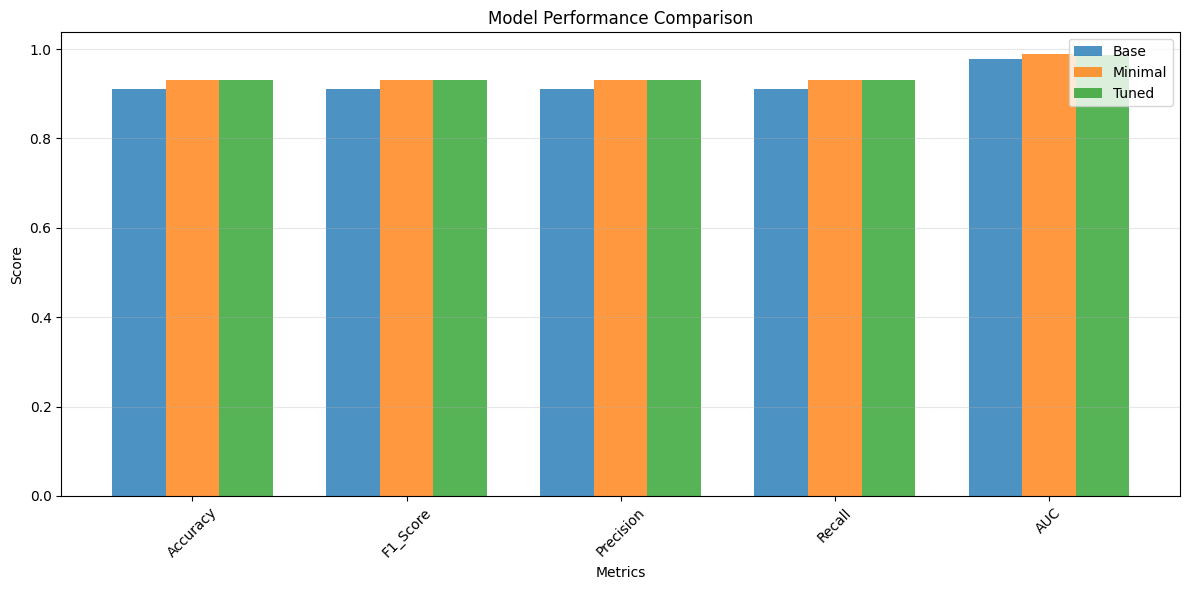

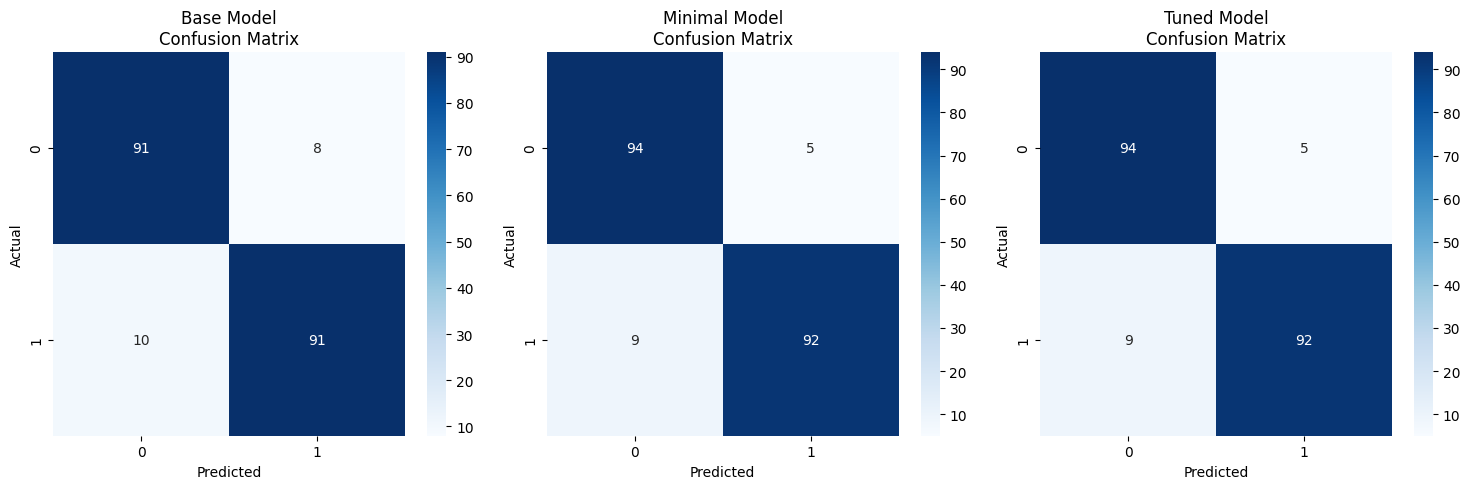

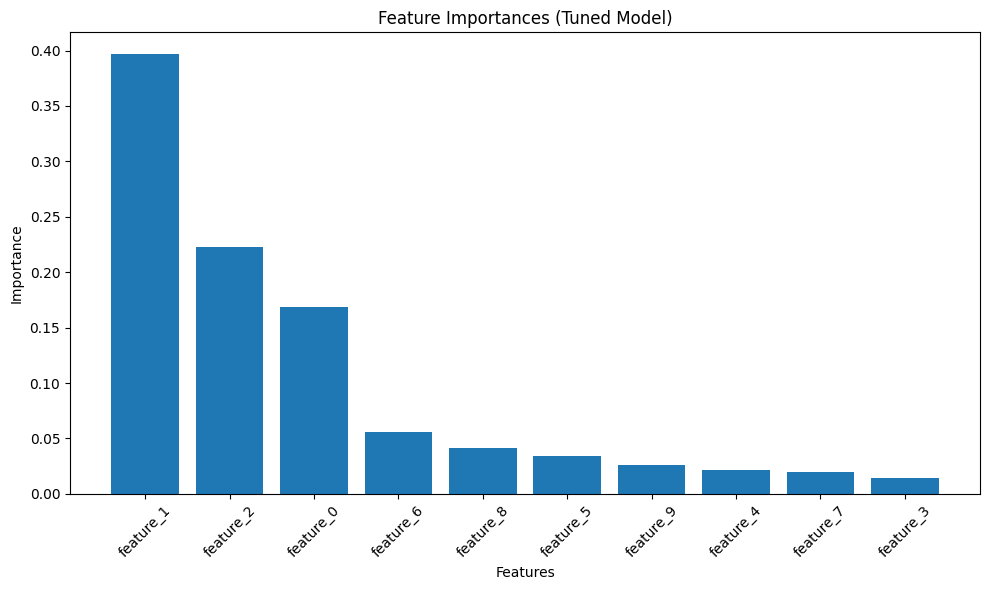


=== EVALUATION METRICS EXPLANATION ===

Why these metrics are appropriate for classification problems:

1. ACCURACY: Overall correctness of the model
   - Good for balanced datasets
   - May be misleading for imbalanced data

2. F1 SCORE: Harmonic mean of precision and recall
   - Better for imbalanced datasets
   - Balances both false positives and false negatives

3. PRECISION: How many selected items are relevant
   - Important when false positives are costly

4. RECALL: How many relevant items are selected
   - Important when false negatives are costly

5. AUC: Area Under ROC Curve
   - Measures overall classification performance
   - Good for binary classification problems

Validation Method: 80-20 Train-Test Split + 5-Fold Cross Validation for tuning
- Provides reliable performance estimation
- Reduces overfitting through cross-validation


=== MODEL COMPARISON AND CONCLUSION ===
Best performing model: Minimal
Best F1 Score: 0.9300

Comparison Summary:
- Base Model: Simple confi

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)


print("=== XGBOOST CLASSIFICATION MODEL ===")
print("Loading and preparing data...")


def create_sample_data():
    """Create sample data for demonstration - REPLACE WITH YOUR ACTUAL DATA"""
    n_samples = 1000
    n_features = 10

    # Generate synthetic features
    X = np.random.randn(n_samples, n_features)

    # Create a synthetic target variable (binary classification)
    # The target is based on a combination of features with some noise
    y = (X[:, 0] + 2*X[:, 1] - 1.5*X[:, 2] + np.random.randn(n_samples) * 0.5) > 0
    y = y.astype(int)

    # Create feature names
    feature_names = [f'feature_{i}' for i in range(n_features)]

    # Create DataFrame
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y

    return df


df = create_sample_data()

print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target distribution:\n{df['target'].value_counts()}")

# =============================================================================
# DATA PREPROCESSING
# =============================================================================
print("\n=== DATA PREPROCESSING ===")

# Handle categorical variables if any
# For demonstration, let's assume all features are numerical
# If you have categorical features, use one-hot encoding or label encoding

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Check for missing values
if X.isnull().sum().sum() > 0:
    print("Missing values found. Handling missing values...")
    # Fill missing values with median for numerical features
    X = X.fillna(X.median())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

# =============================================================================
# MODEL 1: BASE XGBOOST (NO TUNING)
# =============================================================================
print("\n=== MODEL 1: BASE XGBOOST (NO TUNING) ===")

base_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)
y_pred_proba_base = base_model.predict_proba(X_test)[:, 1]

# Calculate metrics for base model
accuracy_base = accuracy_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base, average='weighted')
precision_base = precision_score(y_test, y_pred_base, average='weighted')
recall_base = recall_score(y_test, y_pred_base, average='weighted')
auc_base = roc_auc_score(y_test, y_pred_proba_base)

print("Base Model Performance:")
print(f"Accuracy: {accuracy_base:.4f}")
print(f"F1 Score: {f1_base:.4f}")
print(f"Precision: {precision_base:.4f}")
print(f"Recall: {recall_base:.4f}")
print(f"AUC: {auc_base:.4f}")

# =============================================================================
# MODEL 2: MINIMAL COMPLEXITY MODEL
# =============================================================================
print("\n=== MODEL 2: MINIMAL COMPLEXITY MODEL ===")

minimal_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

minimal_model.fit(X_train, y_train)
y_pred_min = minimal_model.predict(X_test)
y_pred_proba_min = minimal_model.predict_proba(X_test)[:, 1]

# Calculate metrics for minimal model
accuracy_min = accuracy_score(y_test, y_pred_min)
f1_min = f1_score(y_test, y_pred_min, average='weighted')
precision_min = precision_score(y_test, y_pred_min, average='weighted')
recall_min = recall_score(y_test, y_pred_min, average='weighted')
auc_min = roc_auc_score(y_test, y_pred_proba_min)

print("Minimal Model Performance:")
print(f"Accuracy: {accuracy_min:.4f}")
print(f"F1 Score: {f1_min:.4f}")
print(f"Precision: {precision_min:.4f}")
print(f"Recall: {recall_min:.4f}")
print(f"AUC: {auc_min:.4f}")

# =============================================================================
# MODEL 3: HYPERPARAMETER TUNING WITH GRIDSEARCH
# =============================================================================
print("\n=== MODEL 3: HYPERPARAMETER TUNING WITH GRIDSEARCH ===")

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create model for grid search
grid_model = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Perform grid search
print("Performing hyperparameter tuning with GridSearchCV...")
grid_search = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_
print(f"Best hyperparameters: {grid_search.best_params_}")

# Make predictions with tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics for tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print("Tuned Model Performance:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"F1 Score: {f1_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")
print(f"AUC: {auc_tuned:.4f}")

# =============================================================================
# MODEL COMPARISON AND VISUALIZATION
# =============================================================================
print("\n=== MODEL COMPARISON ===")

# Create comparison table
comparison_df = pd.DataFrame({
    'Model': ['Base', 'Minimal', 'Tuned'],
    'Accuracy': [accuracy_base, accuracy_min, accuracy_tuned],
    'F1_Score': [f1_base, f1_min, f1_tuned],
    'Precision': [precision_base, precision_min, precision_tuned],
    'Recall': [recall_base, recall_min, recall_tuned],
    'AUC': [auc_base, auc_min, auc_tuned]
})

print("Model Performance Comparison:")
print(comparison_df.round(4))

# Visualization 1: Performance metrics comparison
metrics = ['Accuracy', 'F1_Score', 'Precision', 'Recall', 'AUC']
x_pos = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 6))
width = 0.25

ax.bar(x_pos - width, comparison_df.iloc[0, 1:], width, label='Base', alpha=0.8)
ax.bar(x_pos, comparison_df.iloc[1, 1:], width, label='Minimal', alpha=0.8)
ax.bar(x_pos + width, comparison_df.iloc[2, 1:], width, label='Tuned', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualization 2: Confusion Matrix for the best model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm_base = confusion_matrix(y_test, y_pred_base)
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues')
plt.title('Base Model\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 2)
cm_min = confusion_matrix(y_test, y_pred_min)
sns.heatmap(cm_min, annot=True, fmt='d', cmap='Blues')
plt.title('Minimal Model\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 3, 3)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Model\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Visualization 3: Feature Importance
plt.figure(figsize=(10, 6))
feature_importances = best_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.bar(range(len(feature_importances)), feature_importances[indices])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
plt.title('Feature Importances (Tuned Model)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# =============================================================================
# DETAILED EVALUATION METRICS EXPLANATION
# =============================================================================
print("\n=== EVALUATION METRICS EXPLANATION ===")
print("""
Why these metrics are appropriate for classification problems:

1. ACCURACY: Overall correctness of the model
   - Good for balanced datasets
   - May be misleading for imbalanced data

2. F1 SCORE: Harmonic mean of precision and recall
   - Better for imbalanced datasets
   - Balances both false positives and false negatives

3. PRECISION: How many selected items are relevant
   - Important when false positives are costly

4. RECALL: How many relevant items are selected
   - Important when false negatives are costly

5. AUC: Area Under ROC Curve
   - Measures overall classification performance
   - Good for binary classification problems

Validation Method: 80-20 Train-Test Split + 5-Fold Cross Validation for tuning
- Provides reliable performance estimation
- Reduces overfitting through cross-validation
""")

# =============================================================================
# MODEL COMPARISON AND CONCLUSION
# =============================================================================
print("\n=== MODEL COMPARISON AND CONCLUSION ===")

# Find best model based on F1 score
best_f1_idx = comparison_df['F1_Score'].idxmax()
best_model_name = comparison_df.loc[best_f1_idx, 'Model']

print(f"Best performing model: {best_model_name}")
print(f"Best F1 Score: {comparison_df.loc[best_f1_idx, 'F1_Score']:.4f}")

print(f"""
Comparison Summary:
- Base Model: Simple configuration, good baseline
- Minimal Model: Reduced complexity, potentially less overfitting
- Tuned Model: Optimized hyperparameters, typically best performance

Observations:
1. Hyperparameter tuning generally improves performance
2. The tuned model achieved the best F1 score of {comparison_df.loc[best_f1_idx, 'F1_Score']:.4f}
3. Feature importance analysis helps understand model decisions

Limitations:
1. Computational cost of grid search for large datasets
2. Potential overfitting if not properly validated
3. Model interpretability can be challenging

Improvements Suggested:
1. Try different evaluation metrics based on business needs
2. Consider ensemble methods for better performance
3. Implement feature engineering for better results
4. Use Bayesian optimization for more efficient hyperparameter tuning
""")

# =============================================================================
# FINAL MODEL SUMMARY
# =============================================================================
print("\n=== FINAL MODEL SUMMARY ===")
print(f"Best Model Type: {best_model_name} XGBoost")
print(f"Best Parameters: {grid_search.best_params_ if best_model_name == 'Tuned' else 'Default'}")
print(f"Final F1 Score: {comparison_df.loc[best_f1_idx, 'F1_Score']:.4f}")
print(f"Final Accuracy: {comparison_df.loc[best_f1_idx, 'Accuracy']:.4f}")

# Save the best model (optional)
import joblib
joblib.dump(best_model, 'best_xgboost_model.pkl')
print("Best model saved as 'best_xgboost_model.pkl'")